# LightGBM MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import lightgbm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, fbeta_score

## Data

In [2]:
full_train = pd.read_csv("../../../data/csev/model_6/fulltrainCSEVscal.csv")
full_test = pd.read_csv("../../../data/csev/model_6/fulltestCSEVscal.csv")

In [3]:
Y_train = full_train['C_SEV']
X_train = full_train.drop(['C_SEV'], axis=1)
Y_train.value_counts()

0    27794
1    27794
Name: C_SEV, dtype: int64

In [4]:
Y_test = full_test['C_SEV']
X_test = full_test.drop(['C_SEV'], axis=1)
Y_test.value_counts()

1    351139
0      6949
Name: C_SEV, dtype: int64

## LightGBM Classifier

In [5]:
model = lightgbm.LGBMClassifier()

In [6]:
model.fit(X_train, Y_train)

LGBMClassifier()

In [7]:
Y_pred = model.predict(X_test)

## Evaluation

In [8]:
metrics.accuracy_score(Y_test, Y_pred)

0.6628314827640133

Matriz de confusión
[[  4888   2061]
 [118675 232464]]
Matriz de confusión normalizada
[[0.70341056 0.29658944]
 [0.33797157 0.66202843]]


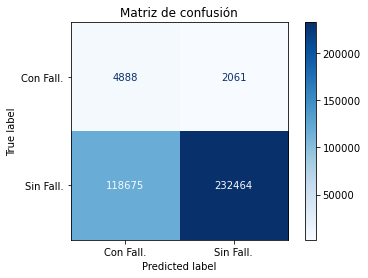

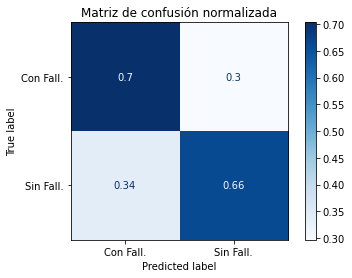

In [9]:
titles_options = [
    ("Matriz de confusión", None),
    ("Matriz de confusión normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test,
        display_labels=['Con Fall.', 'Sin Fall.'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [10]:
print("Classification Report")
print(classification_report(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.04      0.70      0.07      6949
           1       0.99      0.66      0.79    351139

    accuracy                           0.66    358088
   macro avg       0.52      0.68      0.43    358088
weighted avg       0.97      0.66      0.78    358088



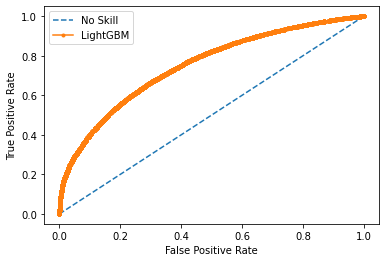

In [11]:
# Curva ROC
# keep probabilities for the positive outcome only
yhat = model.predict_proba(X_test)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(Y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LightGBM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [12]:
fbeta_score(Y_test, Y_pred, average='binary', beta=2)

0.7091290790388028

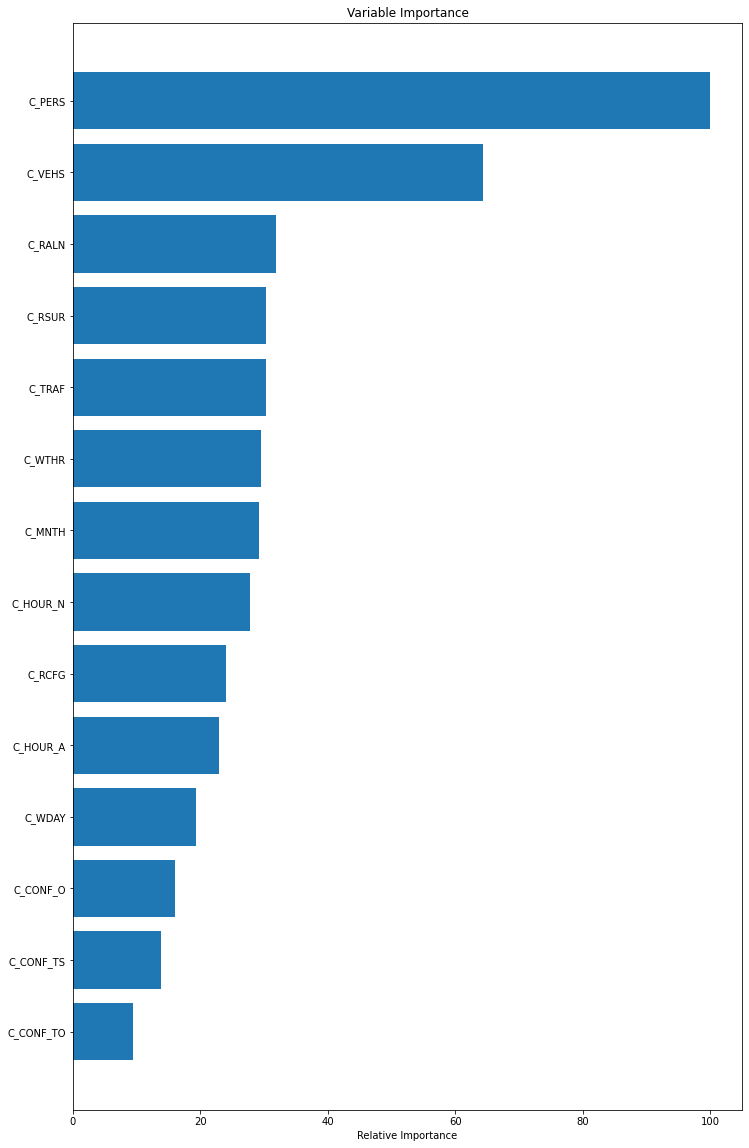

In [13]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()